In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import axes

In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')

In [4]:
ibm_df.head()

,Date,IBM common stock closing prices
0,1/2/1962,572.00
1,1/3/1962,577.00
2,1/4/1962,571.25
3,1/5/1962,560.00
4,1/8/1962,549.50


In [5]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)

In [6]:
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

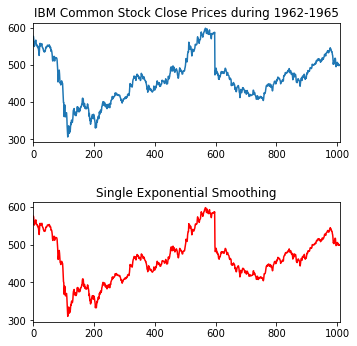

In [7]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')
plt.savefig('plots/Section 2/_02_1.png', format='png', dpi=300)

In [8]:
ibm_df['SES2'] = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8)

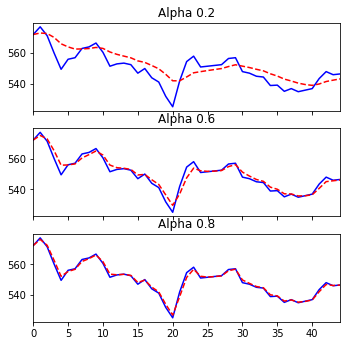

In [9]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
plt.savefig('plots/Section 3/_02_02.png', format='png', dpi=300)